<h1>Mode 30 - 2020</h1>

In [7]:
import json
from matplotlib import pyplot as plt
import pandas as pd

In [8]:
windowSize = 50
RuleBasedResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode30-dqn/bertsekas-marl/rule_based_2020.json'
SequentialResults = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode30-dqn/bertsekas-marl/sequential_rollout_2020.json'
Seq_Adversary = '/Users/athmajanvivekananthan/WCE/JEPA - MARL/multi-agent/PPO/bert_marl/mode30-dqn/bertsekas-marl/sequential_adversary_op_2020.json'


def findMovingAvg(inputDF,window):
    movingAvgList = []
    for i in range(inputDF.shape[0] - window):
        newDF = inputDF.loc[i:i + window]
        epi = inputDF.iloc[i]['episode']
        meanVal = newDF['steps'].mean()
        movingAvgList.append({'episode':epi, 'smoothed_steps':meanVal})
    dfMovingAvg = pd.DataFrame(movingAvgList)
    return dfMovingAvg

<h3>Load rule based plot</h3>


In [4]:
with open(RuleBasedResults, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfBasePolicy = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)

<h3>Load Sequential Rollout  plot</h3>

In [5]:
with open(SequentialResults, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfSeqRollout = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)


<h3>Load Adversary Sequential Rollout  plot</h3>

In [9]:
with open(Seq_Adversary, 'r') as file:
        data = json.load(file)
listOfWholeTraining = []
epochs = list(data.keys())

i = 0
for trainEpoch in epochs:
    epochData = data[str(trainEpoch)]
    for indData in epochData:
        steps = indData['StepsToSolve']
        listOfWholeTraining.append({"episode": i, "steps": steps})
        i += 1

dfSeq_Adversary = findMovingAvg(pd.DataFrame(listOfWholeTraining), windowSize)


<h2>Plots</h2>

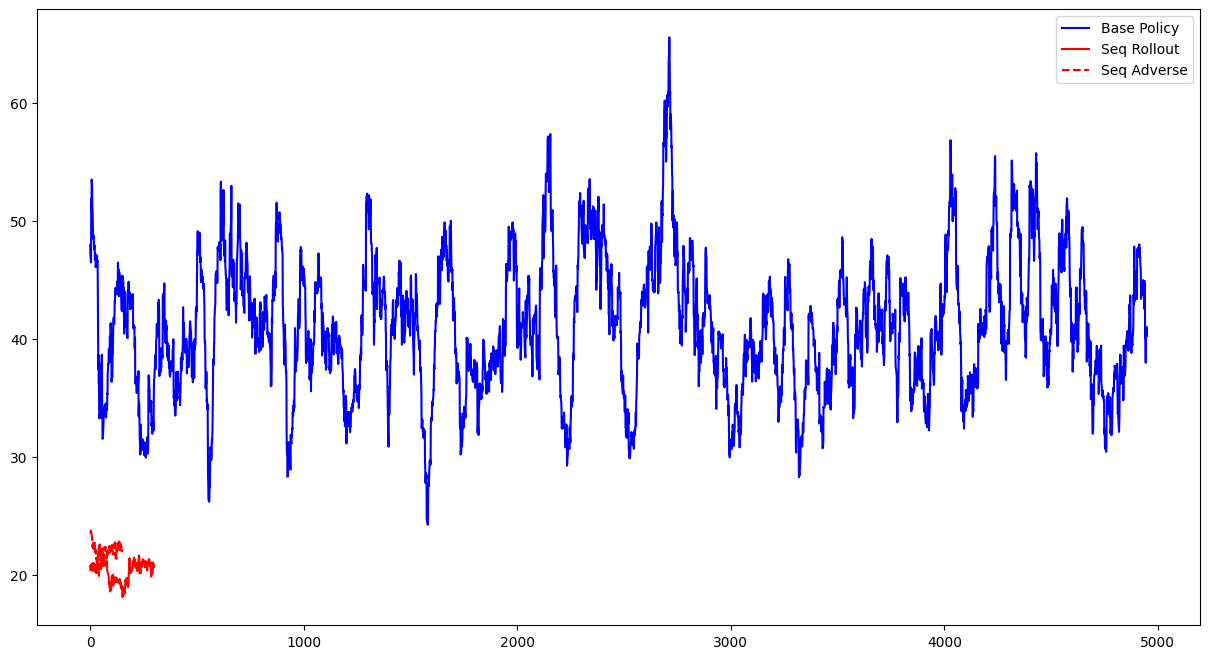

In [16]:
plt.figure(figsize=(15, 8))
plt.plot(dfBasePolicy['episode'], dfBasePolicy['smoothed_steps'], label='Base Policy', color='blue', linestyle='-')
plt.plot(dfSeqRollout['episode'], dfSeqRollout['smoothed_steps'], label='Seq Rollout', color='red', linestyle='-')
plt.plot(dfSeq_Adversary['episode'], dfSeq_Adversary['smoothed_steps'], label='Seq Adverse', color='red', linestyle='--')
plt.legend()

<h2> Training Plots</h2>